In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\sunil\Desktop\NIT Intership proj\9. Mental_Health_Detection\mental_health_synthetic_dataset.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (100000, 2)


,text,label
0,Nothing makes me happy anymore Admit need pict...,depression
1,Too many things are happening at once Owner he...,stress
2,"Just finished a workout, feeling good! Full no...",none
3,I feel hopeless and empty Anything success its...,depression
4,I'm tired all the time Authority with poor yea...,depression


Label Distribution:
 label
anxiety       25229
none          25046
stress        24956
depression    24769
Name: count, dtype: int64


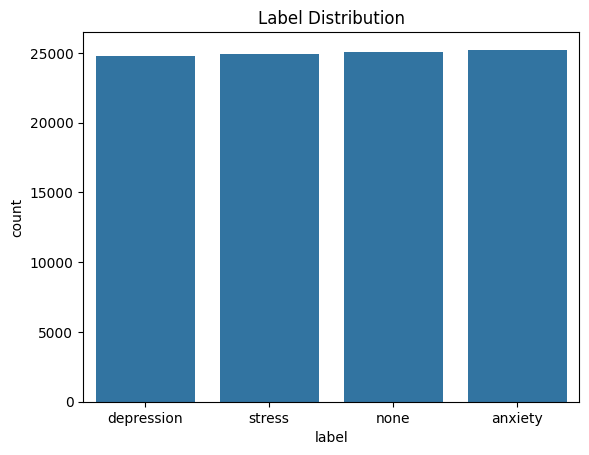

In [11]:
# Step 3: Basic EDA
print("Label Distribution:\n", df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title("Label Distribution")
plt.show()

In [13]:
# Step 4: Text Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\d+", "", text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

In [15]:
print("Cleaning text...")
df['clean_text'] = df['text'].apply(clean_text)

Cleaning text...


In [17]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)


In [19]:
# Step 6: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [21]:
# Step 7: Model Training
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=200)

              precision    recall  f1-score   support

     anxiety       1.00      1.00      1.00      5017
  depression       1.00      1.00      1.00      5007
        none       1.00      1.00      1.00      5019
      stress       1.00      1.00      1.00      4957

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



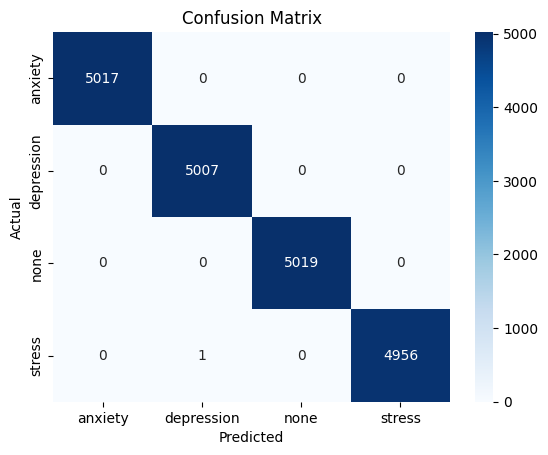

In [23]:
# Step 8: Evaluation
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [26]:
# Prediction

In [29]:
def predict_mental_health(text):
    # Preprocess the text
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\d+", "", text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    cleaned_text = " ".join(tokens)
    
    # Vectorize and predict
    text_vector = vectorizer.transform([cleaned_text])
    prediction = model.predict(text_vector)[0]
    prediction_proba = model.predict_proba(text_vector)[0]
    
    return prediction, prediction_proba


In [33]:
sample_text = "I feel like I'm under so much pressure and can't sleep."
label, probabilities = predict_mental_health(sample_text)

print(f"Predicted Label: {label}")
print("Prediction Probabilities:")


Predicted Label: stress
Prediction Probabilities:


In [ ]:
# Pickel it for UI

In [35]:
import pickle

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

# Save the trained Logistic Regression model
with open("mental_health_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!
